In [1]:
%pylab inline

pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Moire_TBG_phonons/BM_bandstructure"
pathchow='/home/jfm343/Documents/BM_bandstructure'
pathpc='/home/juan/Documents/Projects/BM_bandstructure'

import numpy as np
import pandas as pd
import os
import sys

mach='Mac'

if mach=='Mac':
    pathy=pathMAC
    path_data=pathy+'/data'
    sys.path.insert(0, pathy+'/Mods_disp')
    sys.path.insert(0, pathy+'/Mods_corr')
if mach=='pc':
    pathy=pathpc
    path_data=pathy+'/data'
    sys.path.insert(0, pathy+'/Mods_disp')
    sys.path.insert(0, pathy+'/Mods_corr')

import Dispersion
import MoireLattice
from scipy import linalg as la
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
from SCF_M_point import Mean_field_M
import pickle
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size'   : 14})
rc('text', usetex=True)
import Eq_time_corrs_M_MF

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
Nsamp=4
theta=1.05*np.pi/180  # magic angle
c6sym=True
umkl=0 #the number of umklaps where we calculate an observable ie Pi(q), for momentum transfers we need umkl+1 umklapps when scattering from the 1bz
l=MoireLattice.MoireTriangLattice(Nsamp,theta,0,c6sym,umkl)
lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2,c6sym,umkl) #this one is normalized
[q1,q2,q3]=l.q
q=np.sqrt(q1@q1)

starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.0024030208587646484  s
size of q before symmetr... 16
size of q after symmetr... 19
size of q before symmetr... 16
size of q after symmetr... 19
16 1bz numer of sampling lattice points
19 1bz numer of sampling lattice points c3
19 X numer of sampling lattice points
112 Q numer of sampling lattice points
the shape of the index q array (16, 19)
1 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (16, 1)
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.001657724380493164  s
size of q before symmetr... 16
size of q after symmetr... 19
size of q before symmetr... 16
size of q after symmetr... 19
16 1bz numer of sampling lattice points
19 1bz numer of sampling lattice points c3
19 X numer of sampling lattice points
112 Q numer of sampling lattice points
the shape of the index q array (16, 19)
1 G numer of sampling re

In [3]:

fullpath=path_data+'/g3_12_2023-04-11-18-56-55/g3_12_1.05/data_mu_0_g2_3.pkl'
# Read the object from the pickle file
with open(fullpath, 'rb') as file:
    B1 = pickle.load(file)


In [4]:


# import importlib     
# importlib.reload(Eq_time_corrs_M_MF) #

In [5]:
trans_corr=Eq_time_corrs_M_MF.Eq_time_corrs( B1, 'a', 'trans', dir='../data/g3_12_2023-04-10-18-29-58')

qq 0.07676251561000431
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
the shape of the index qpM array (72, 17) compare to  72
the shape of the index qpM array (72, 17) compare to  72
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (17,)
calculating tensor that stores the overlaps, layer 3, sublattice 1........
finsihed the overlaps.......... 4.336740016937256

In [6]:

# phiT=1
# T=0.001
# res_t=trans_corr.MF_corr_eq( args = (0.0,T,phiT, False) )

In [7]:
# bs=lq.boundary()
# [GM1,GM2]=lq.GMvec
# mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
# for mult in mults:
#     plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

# plt.scatter(B1.latt.KX,B1.latt.KY, c=res_t, marker='h', s=50, cmap='Blues_r')
# plt.colorbar()

In [8]:
# phiT=1
# T=0.001
# res_tv2=trans_corr.MF_corr_eq_v2( args = (0.0,T,phiT, False) )

In [9]:
# bs=lq.boundary()
# [GM1,GM2]=lq.GMvec
# mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
# for mult in mults:
#     plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

# plt.scatter(B1.latt.KX,B1.latt.KY, c=res_tv2, marker='h', s=50, cmap='Blues_r')
# plt.colorbar()

In [10]:
# bs=lq.boundary()
# [GM1,GM2]=lq.GMvec
# mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
# for mult in mults:
#     plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

# plt.scatter(B1.latt.KX,B1.latt.KY, c=np.abs(res_t-res_tv2), marker='h', s=50, cmap='Blues_r')
# plt.colorbar()

In [46]:
phiT=0.1
T=0.0
res_tv2=trans_corr.MF_corr_eq_back_v2( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 0.1272599697113037


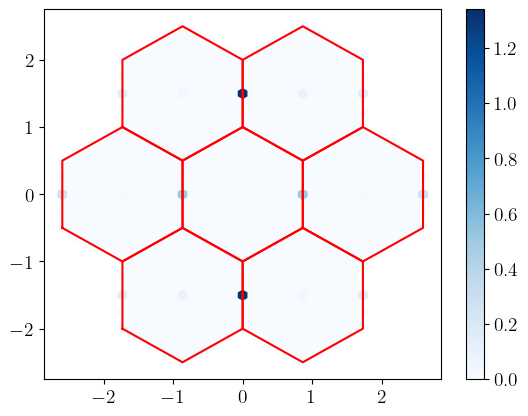

In [47]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_tv2), marker='h', s=50, cmap='Blues')
plt.colorbar()

In [28]:
# phiT=1
# T=0.001
# res_phi_trans=[]
# Phis=np.linspace(0,0.01, 11)
# for phiT in Phis:
#     res_t=trans_corr.MF_corr_eq( args = (0.0,T,phiT, False) )
#     res_phi_trans.append(res_t)

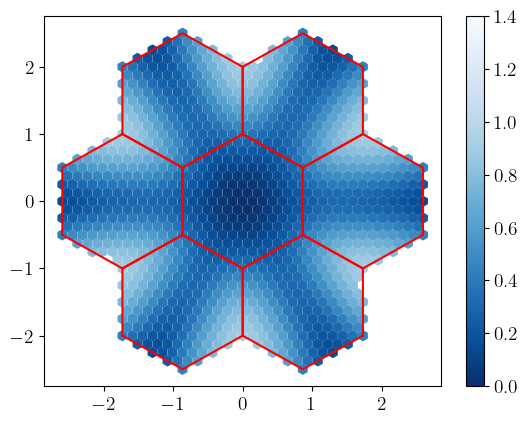

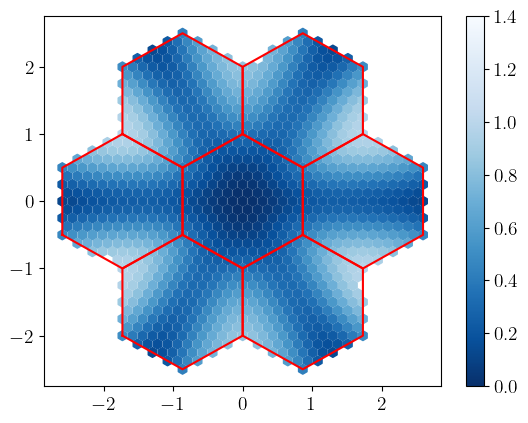

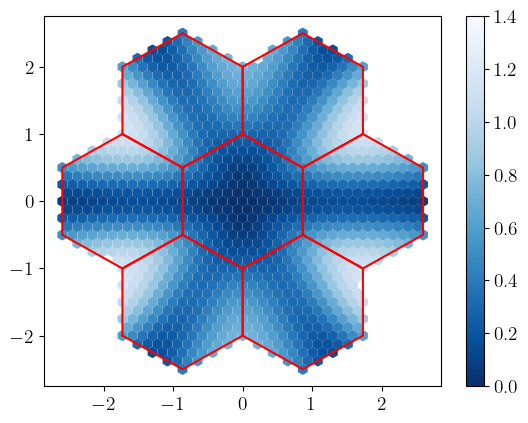

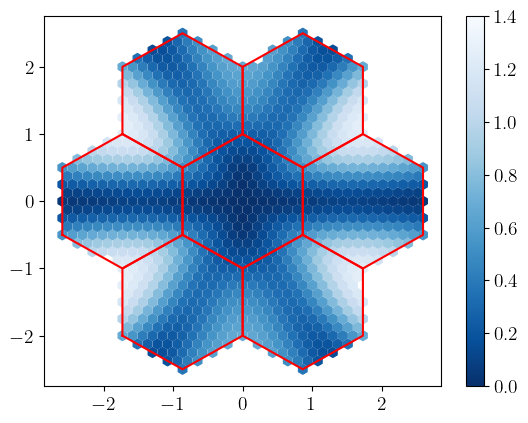

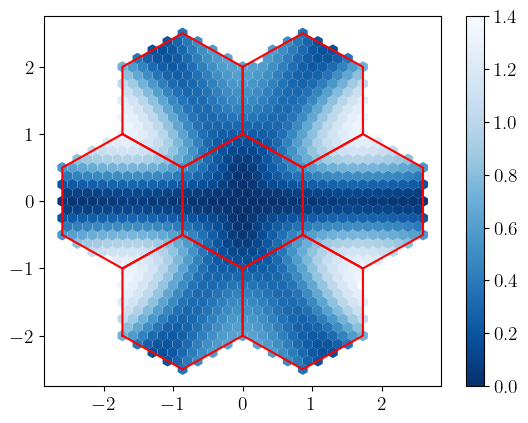

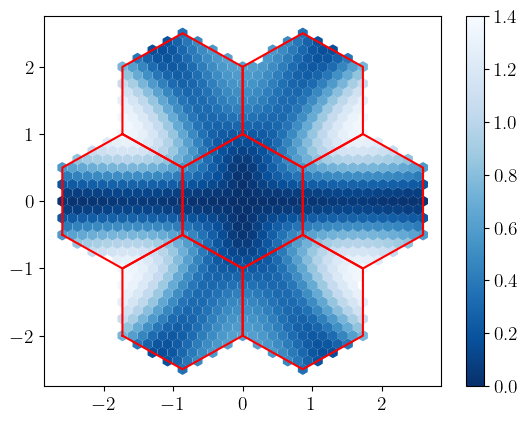

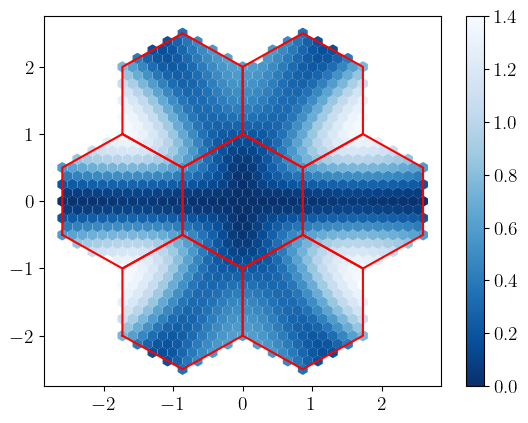

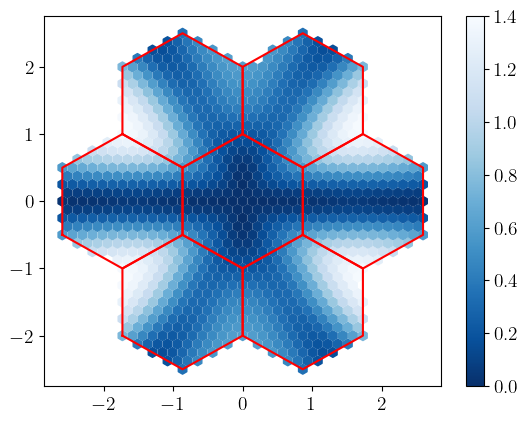

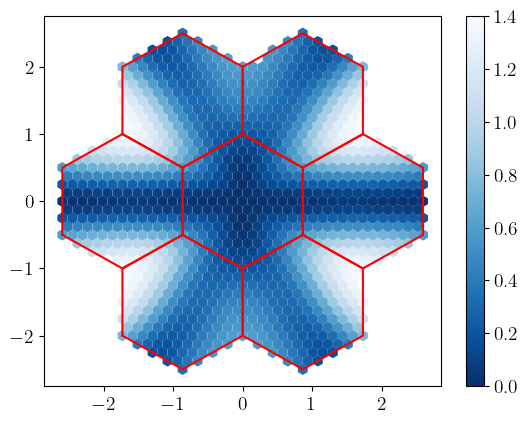

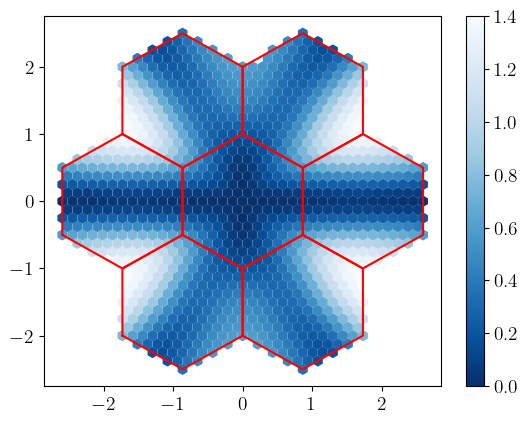

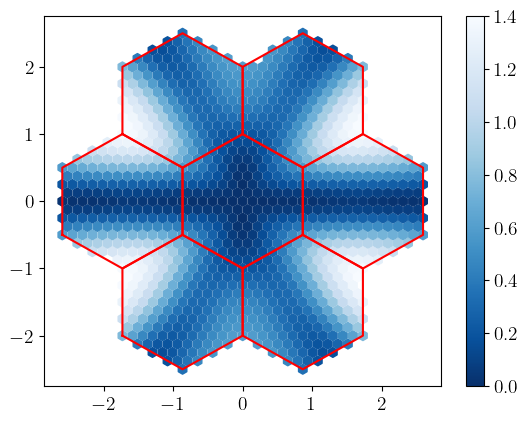

In [ ]:
# bs=lq.boundary()
# [GM1,GM2]=lq.GMvec
# mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
# for i,phiT in enumerate(Phis):
#     for mult in mults:
#         plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')


#     plt.scatter(B1.latt.KX,B1.latt.KY, c=res_phi_trans[i], marker='h', s=50, cmap='Blues_r', vmin=0, vmax=1.4)
#     plt.colorbar()
#     plt.show()

In [ ]:
phiT=0
T=0.001
res_t0=trans_corr.MF_corr_eq( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 10.005905866622925


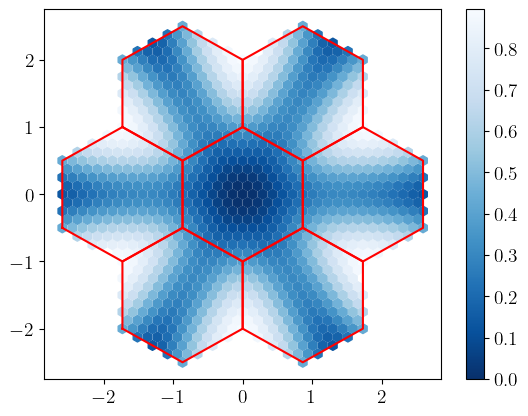

In [ ]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_t0, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [ ]:
phiT=0
T=0.01
res_t02=trans_corr.corr_eq( args = (0.0,T,False) )

starting bubble.......
time for bubble... 4.001183986663818


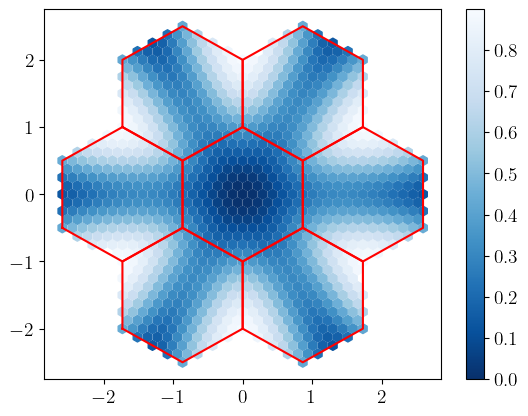

In [ ]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_t02, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [23]:
subl_corr=Eq_time_corrs_M_MF.Eq_time_corrs( B1, 's', 'subl', dir='../data/g3_12_2023-04-10-18-29-58')

qq 0.07676251561000431
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
the shape of the index qpM array (72, 17) compare to  72
the shape of the index qpM array (72, 17) compare to  72
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (17,)
calculating tensor that stores the overlaps, layer 0, sublattice 3........
finsihed the overlaps.......... 3.312309980392456

In [24]:
phiT=1
T=0.001
res_subl=subl_corr.MF_corr_eq( args = (0.0,T,phiT, False) )


starting bubble.......
time for bubble... 8.510090112686157


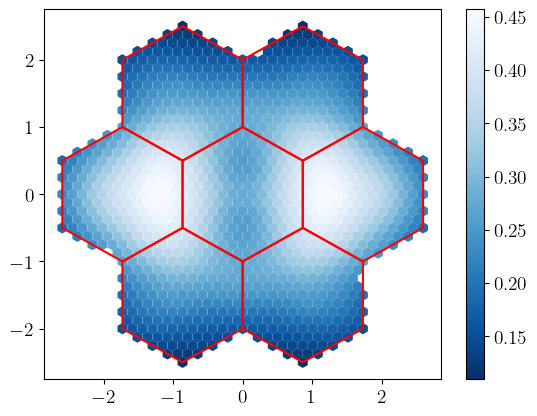

In [25]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_subl, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [26]:
phiT=1
T=0.001
res_subl=subl_corr.MF_corr_eq_v2( args = (0.0,T,phiT, False) )


starting bubble.......
time for bubble... 5.617032766342163


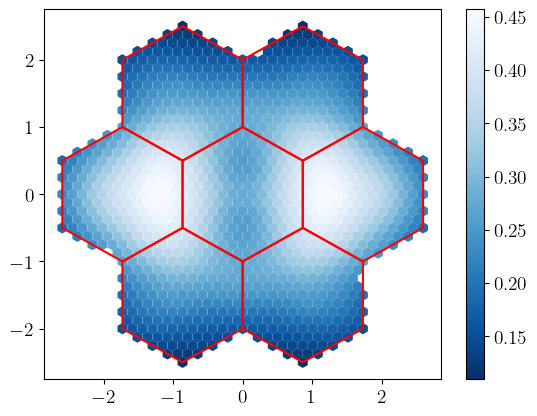

In [27]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res_subl, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [43]:
phiT=0.01
T=0.001
res_tv2=subl_corr.MF_corr_eq_back_v2( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 0.1377720832824707


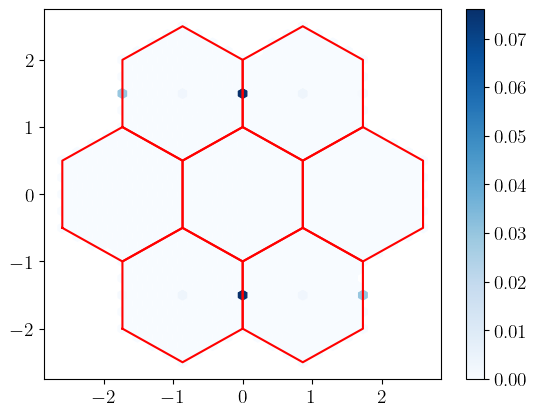

In [44]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=np.abs(res_tv2), marker='h', s=50, cmap='Blues')
plt.colorbar()

In [ ]:
# phiT=1
# T=0.001
# res_phi_subl=[]
# Phis=np.linspace(0,0.01, 11)
# for phiT in Phis:
#     res_subl=subl_corr.MF_corr_eq( args = (0.0,T,phiT, False) )
#     res_phi_subl.append(res_subl)

starting bubble.......
time for bubble... 9.989474773406982
starting bubble.......
time for bubble... 10.284321069717407
starting bubble.......
time for bubble... 10.204764127731323
starting bubble.......
time for bubble... 10.208341121673584
starting bubble.......
time for bubble... 10.241618156433105
starting bubble.......
time for bubble... 10.227132320404053
starting bubble.......
time for bubble... 10.185837268829346
starting bubble.......
time for bubble... 10.136716604232788
starting bubble.......
time for bubble... 10.283129930496216
starting bubble.......
time for bubble... 10.121628046035767
starting bubble.......
time for bubble... 10.189280986785889


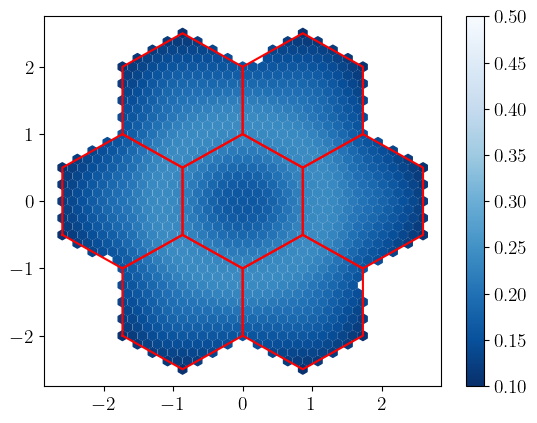

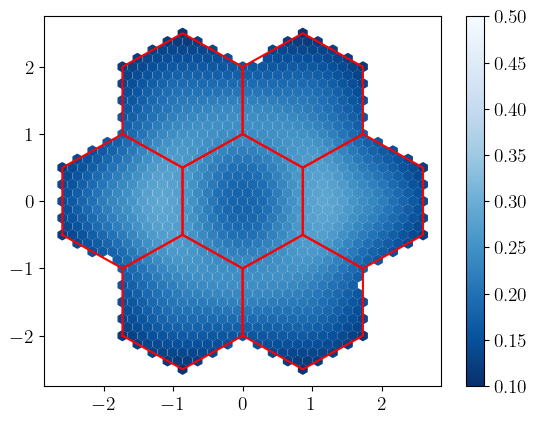

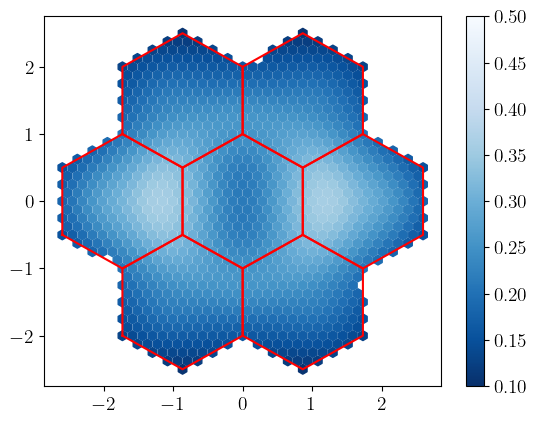

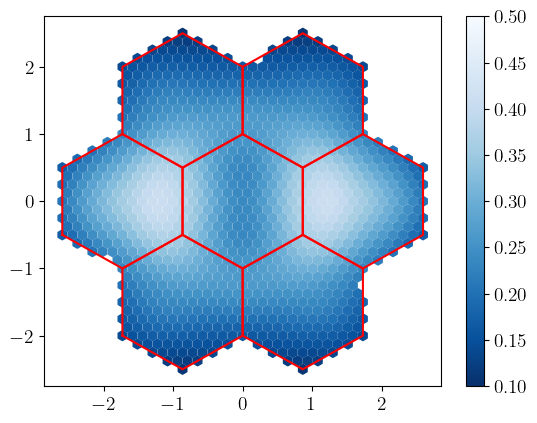

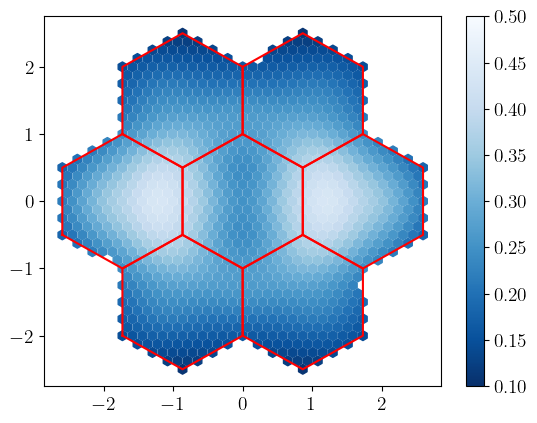

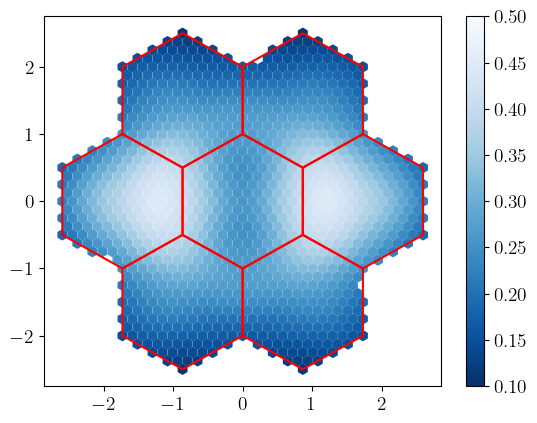

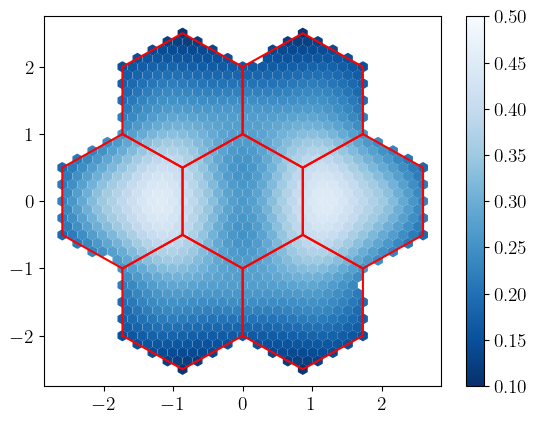

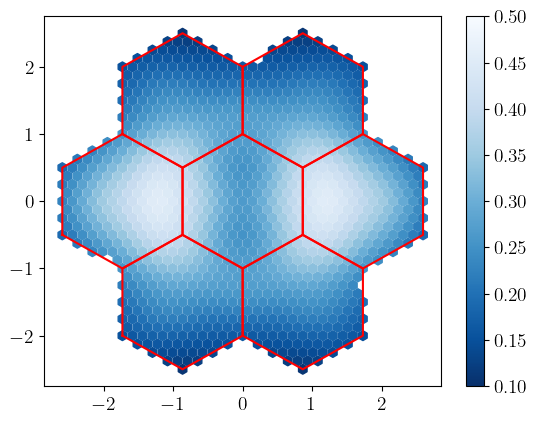

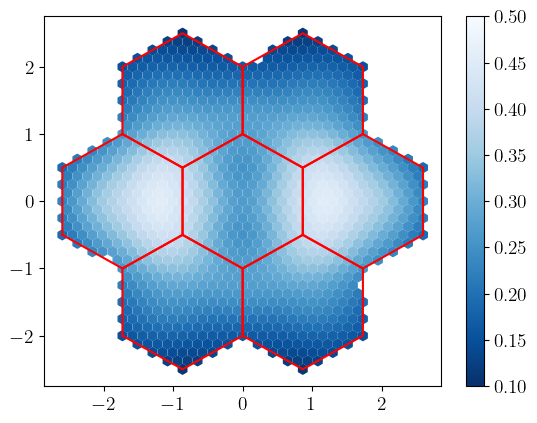

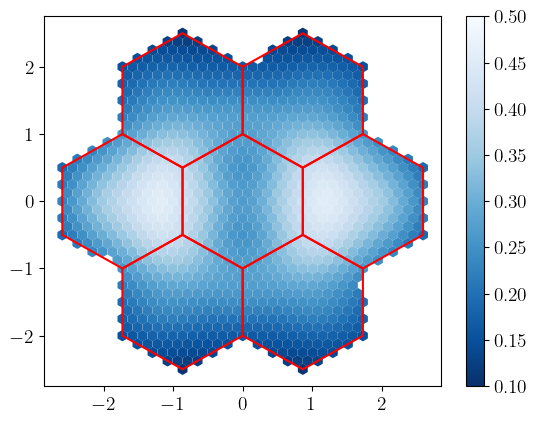

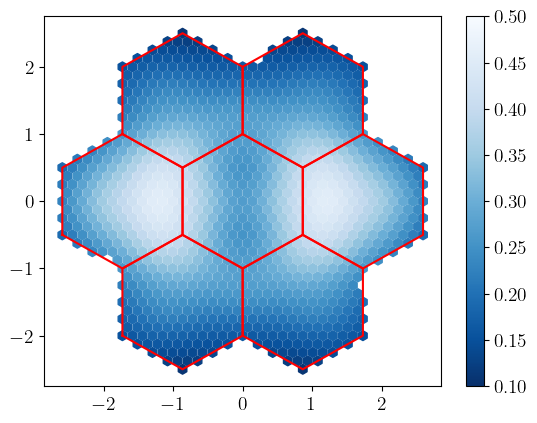

In [ ]:
# bs=lq.boundary()
# [GM1,GM2]=lq.GMvec
# mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
# for i,phiT in enumerate(Phis):
#     for mult in mults:
#         plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')


#     plt.scatter(B1.latt.KX,B1.latt.KY, c=res_phi_subl[i], marker='h', s=50, cmap='Blues_r', vmin=0.1, vmax=.5)
#     plt.colorbar()
#     plt.show()

In [ ]:
phiT=0
T=0.01
res0=subl_corr.MF_corr_eq((0.0,T,phiT))

starting bubble.......
time for bubble... 10.184495210647583


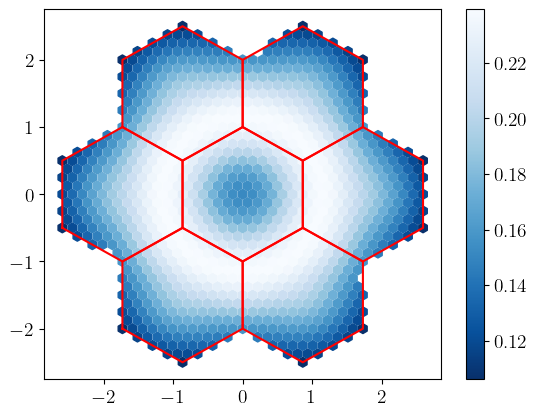

In [ ]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=res0, marker='h', s=50, cmap='Blues_r')
plt.colorbar()

In [32]:
long_corr=Eq_time_corrs_M_MF.Eq_time_corrs( B1, 'a', 'long', dir='../data/g3_12_2023-04-10-18-29-58')

qq 0.07676251561000431
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
the shape of the index qpM array (72, 17) compare to  72
the shape of the index qpM array (72, 17) compare to  72
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (72, 17)
17 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (17,)
calculating tensor that stores the overlaps, layer 3, sublattice 1........
finsihed the overlaps.......... 4.852618932723999

In [33]:
phiT=1
T=0.01
resLong=long_corr.MF_corr_eq((0.0,T,phiT))

ValueError: not enough values to unpack (expected 4, got 3)

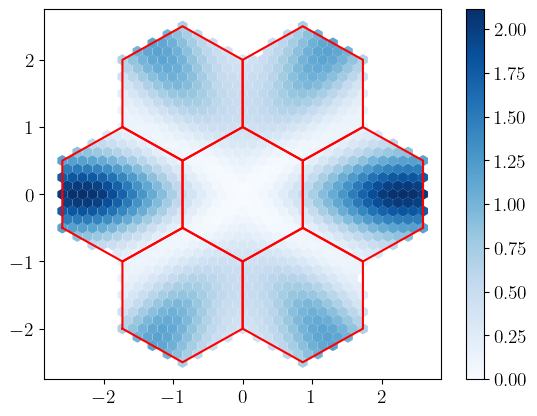

In [ ]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=resLong, marker='h', s=50, cmap='Blues')
plt.colorbar()

In [34]:
phiT=0.01
T=0.001
res_tv2=long_corr.MF_corr_eq_back_v2( args = (0.0,T,phiT, False) )

starting bubble.......
time for bubble... 0.1120140552520752


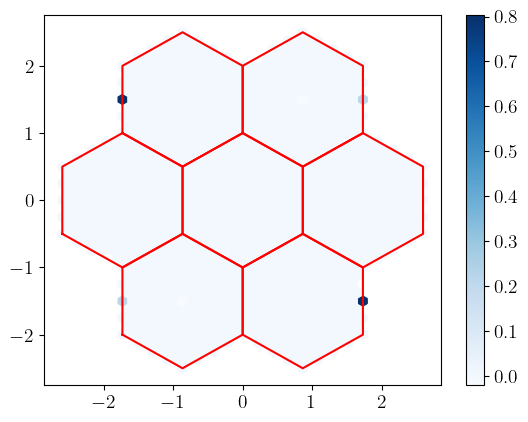

In [41]:
bs=lq.boundary()
[GM1,GM2]=lq.GMvec
mults=[[0,0],[1,0],[-1,0],[0,1],[0,-1],[1,1],[-1,-1]]
for mult in mults:
    plt.plot(bs[:,0]+mult[0]*GM1[0]+mult[1]*GM2[0], bs[:,1]+mult[0]*GM1[1]+mult[1]*GM2[1],c='r')

plt.scatter(B1.latt.KX,B1.latt.KY, c=np.real(res_tv2), marker='h', s=50, cmap='Blues')
plt.colorbar()

In [40]:
B1.latt.KY[np.argmax(res_tv2)]

1.4999999999999991